라이브러리 불러오기

In [1]:
# ! :  vervose, % : mute
#%pip install -U ultralytics
#%pip install roboflow
# From: https://github.com/facebookresearch/VideoPose3D/issues/198
#%pip install h5py
#%conda install PyYaml
!yolo checks

import torch
from ultralytics import *
from IPython.display import display, Image
from roboflow import Roboflow

print('cuda ver %s'%(torch.version.cuda))
print('torch ver %s, %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Invalid code page
Ultralytics YOLOv8.0.112  Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 328.1/465.0 GB disk)


cuda ver 11.8
torch ver 2.0.1, _CudaDeviceProperties(name='NVIDIA GeForce RTX 3080', major=8, minor=6, total_memory=10239MB, multi_processor_count=68)


데이터셋 다운로드

In [2]:
rf = Roboflow(api_key="htO1goHTilfzwkFNKPiM")
project = rf.workspace("ajou-university-luahm").project("alcoholbottledetect-sasaj")

# resized merged
dataset1 = project.version(5).download("yolov8","datasets/1merged")
dataset1 = project.version(5).download("yolov5","datasets/1mergedv5")
dataset1 = project.version(9).download("yolov8", "datasets/merged-augmented")
# resized separate
dataset2 = project.version(6).download("yolov8", "datasets/2separated")
# aggmented separate
dataset3 = project.version(8).download("yolov8", "datasets/3aggmented")
dataset3_2 = project.version(7).download("yolov5", "datasets/3aggmentedv5")
# bottle top
project2 = rf.workspace("ajou-university-luahm").project("alcoholbottledetect-bottletop")
dataset4 = project2.version(4).download("yolov8", "datasets/4bottletop")
dataset4 = project.version(5).download("yolov8", "datasets/bottletop-merged")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.112, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to datasets/1merged in yolov8:: 100%|██████████| 1132/1132 [00:00<00:00, 2719.79it/s]


Extracting Dataset Version Zip to datasets/1mergedv5 in yolov5pytorch:: 100%|██████████| 1132/1132 [00:00<00:00, 2557.50it/s]


Dependency ultralytics<=8.0.20 is required but found version=8.0.112, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to datasets/2separated in yolov8:: 100%|██████████| 1132/1132 [00:00<00:00, 2461.33it/s]


Dependency ultralytics<=8.0.20 is required but found version=8.0.112, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to datasets/3aggmented in yolov8:: 100%|██████████| 2612/2612 [00:01<00:00, 2260.30it/s]


Extracting Dataset Version Zip to datasets/3aggmentedv5 in yolov5pytorch:: 100%|██████████| 2612/2612 [00:01<00:00, 2339.87it/s]

loading Roboflow workspace...


loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.112, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to datasets/4bottletop in yolov8:: 100%|██████████| 1132/1132 [00:00<00:00, 2322.51it/s]


yolov5 학습

In [2]:
#!git clone https://github.com/ultralytics/yolov5.git
#!pip install -r yolov5/requirements.txt
# from : https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/

# data.yaml 경로 ../로 수정할것
dataset_location = "C:/Users/songj/Desktop/Alcohol/datasets/1mergedv5/data.yaml"
#100 random
!python yolov5/train.py --data {dataset_location} --epochs 40 --weights '' --cfg yolov5s.yaml  --batch-size 16 # \exp14
#100 pretrained
!python yolov5/train.py --data {dataset_location} --epochs 40 --weights yolov5s.pt --cfg yolov5s.yaml  --batch-size 16 # exp15

Command 'git remote -v' returned non-zero exit status 1.


Invalid code page
train: weights='', cfg=yolov5s.yaml, data=C:/Users/songj/Desktop/Alcohol/datasets/1mergedv5/data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Invalid code page
Invalid code page
YOLOv5  2023-6-5 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

Command 'git remote -v' returned non-zero exit status 1.


Invalid code page
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=C:/Users/songj/Desktop/Alcohol/datasets/1mergedv5/data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Invalid code page
Invalid code page
YOLOv5  2023-6-5 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a

yolov8학습

In [2]:
# yolo시작 -> 랜덤파라미터 -> pretraind -> class세분화 -> cutoff augmentation -> 병뚜껑시도
# 결과로 혈중알콜농도 

# pretrained from MS coco dataset (80labels)
# n(nano) -> s -> m -> l -> x
# 1merged 2separated (530) 3aggmented (1100)
model1 = YOLO('yolov8m.pt')
dataset_location = "C:/Users/songj/Desktop/Alcohol/datasets/merged-augmented/data.yaml"
#testset_location = "C:/Users/songj/Desktop/Alcohol/datasets/4bottletop/test/images"
testset_location = "C:/Users/songj/Desktop/Alcohol/test"


# Argument: https://docs.ultralytics.com/modes/train/#usage-examples
print("\n\n################################ 학습 ##################################")
results = model1.train(data=dataset_location, epochs=100, batch=16, imgsz=640, cache=True)#, optimizer='Adam', workers=0)
#                                     Class     Images  Instances      Box(P          R      mAP50  mAP50-95)    speed(proc, infe) id
# 1. n, 에폭40,  베치16(vram2g) :  7분,  all        140        289      0.836      0.815       0.83      0.639    0.6/1.4           16
# 1. n, 에폭100, 베치16(vram2g) : 10분,  all        140        289      0.821      0.836      0.873      0.664    0.6/1.7           14
# 1. n, 에폭100, 베치64(vram9g) : 19분,  all        140        289      0.899      0.766      0.839      0.656                      23
# 1. l, 에폭100, 베치16(vram11g) : 최소2시간
# 1. m, 에폭100, 베치16(vram6.7g): 17분, all        140        289       0.87      0.824      0.864      0.685    0.6/8.5           13
# 2. m, 에폭100, 베치16(vram6.7g): 17분, all        140        289      0.863      0.772      0.815      0.668    0.6/7.1           15
# \predict28  \train26 val18
# 3. m, 에폭100, 베치16(vram6.7g): 52분, all        144        310      0.881      0.754      0.799      0.661 
# train28 val21 22 predict31
# 1. m, 에폭100, 베치16(vram6.7g): 17분, all         
# \train27, val20 \predict29
# 4. m, 에폭100, 베치16(vram6.7g): 35분, all        140        297       0.88      0.737      0.813      0.569

# \train30 val23 24
# 머지 병목,어그멘테이션
# all        140        297      0.859      0.758      0.835      0.569

# train32 predict33 val 25 26
# 머지 어그멘테이션 all        140        289      0.895      0.832      0.875      0.686

print("\n\n################################ validation ##################################")
results = model1.val()

print("\n\n################################ test predict ##################################")
results = model1.val(split='test')
results = model1.predict(source=testset_location, save=True, conf=0.25)

print("\n\n################################ export ##################################")
success = model1.export(format='onnx')

New https://pypi.org/project/ultralytics/8.0.114 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.112  Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=C:/Users/songj/Desktop/Alcohol/datasets/merged-augmented/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, a



################################ 학습 ##################################


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics



################################ validation ##################################


Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning C:\Users\songj\Desktop\Alcohol\datasets\merged-augmented\valid\labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]
val: Caching images (0.2GB True): 100%|██████████| 140/140 [00:00<00:00, 1563.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.63it/s]
                   all        140        289      0.895      0.832      0.875      0.686
           beer-bottle        140        154      0.912      0.883      0.916      0.716
              beer-can        140         63      0.801      0.767      0.802      0.616
           soju-bottle        140         72      0.973      0.847      0.907      0.726
Speed: 0.6ms preprocess, 7.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs\detect\val25
Ultralytics YOLOv8.0.112  Python-3.11.3 torch-2.0.1



################################ test predict ##################################


val: Scanning C:\Users\songj\Desktop\Alcohol\datasets\merged-augmented\test\labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 609.53it/s]
val: New cache created: C:\Users\songj\Desktop\Alcohol\datasets\merged-augmented\test\labels.cache
val: Caching images (0.1GB True): 100%|██████████| 50/50 [00:00<00:00, 1367.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                   all         50         83      0.876        0.9      0.911       0.74
           beer-bottle         50         50      0.918       0.92      0.942      0.765
              beer-can         50         14      0.759      0.786      0.808      0.641
           soju-bottle         50         19       0.95      0.994      0.985      0.815
Speed: 1.6ms preprocess, 9.8ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs\detect\val26

image 1/9 C:\Users\songj\Desktop\Al



################################ export ##################################



PyTorch: starting from runs\detect\train32\weights\best.pt with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 7, 8400) (49.6 MB)

ONNX: starting export with onnx 1.14.0 opset 17...


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success  6.9s, saved as runs\detect\train32\weights\best.onnx (98.8 MB)

Export complete (18.2s)
Results saved to C:\Users\songj\Desktop\Alcohol\runs\detect\train32\weights
Predict:         yolo predict task=detect model=runs\detect\train32\weights\best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs\detect\train32\weights\best.onnx imgsz=640 data=C:/Users/songj/Desktop/Alcohol/datasets/merged-augmented/data.yaml 
Visualize:       https://netron.app


In [8]:

testset_location = "C:/Users/songj/Desktop/Alcohol/test4/"

# b1, s6
# s8
# b12 s9
# s6
# b5 s3
# s2
print("병목")
model1 = YOLO("C:/Users/songj/Desktop/Alcohol/runs/detect/train30/weights/best.pt")
model1.predict(source=testset_location, save=True, conf=0.25)

print("\n병합")
model1 = YOLO("C:/Users/songj/Desktop/Alcohol/runs/detect/train32/weights/best.pt")
model1.predict(source=testset_location, save=True, conf=0.25)

병목



image 1/17 C:\Users\songj\Desktop\Alcohol\test4\-2-_png_jpg.rf.5a664c4e1157d56dad820d033cc0a080.jpg: 640x640 1 beer-bottle, 1 soju-bottle, 12.0ms
image 2/17 C:\Users\songj\Desktop\Alcohol\test4\-2023-05-17T221742-210_jpg.rf.1633e5c1c7f285fa46a672f7a09b17b7.jpg: 640x640 4 beer-bottles, 3 soju-bottles, 11.0ms
image 3/17 C:\Users\songj\Desktop\Alcohol\test4\-2023-05-17T221816-995_jpg.rf.c27254346a5960c3ae73bf7cc481433a.jpg: 640x640 1 beer-bottle, 1 soju-bottle, 10.2ms
image 4/17 C:\Users\songj\Desktop\Alcohol\test4\-2023-05-17T221820-374_jpg.rf.771a7233aba6f8ead7b8d45672536a0d.jpg: 640x640 2 beer-bottles, 1 soju-bottle, 13.5ms
image 5/17 C:\Users\songj\Desktop\Alcohol\test4\-2023-05-17T221823-658_jpg.rf.ce53dcf9c94877b1df945591eeef1994.jpg: 640x640 1 beer-bottle, 1 soju-bottle, 9.5ms
image 6/17 C:\Users\songj\Desktop\Alcohol\test4\-25-_jpg.rf.1f91057789688ed75a265d8c24a6564f.jpg: 640x640 1 beer-bottle, 1 soju-bottle, 10.1ms
image 7/17 C:\Users\songj\Desktop\Alcohol\test4\-26-_jpg.rf.d1c7


병합



image 1/17 C:\Users\songj\Desktop\Alcohol\test4\-2-_png_jpg.rf.5a664c4e1157d56dad820d033cc0a080.jpg: 640x640 2 beer-bottles, 1 soju-bottle, 9.5ms
image 2/17 C:\Users\songj\Desktop\Alcohol\test4\-2023-05-17T221742-210_jpg.rf.1633e5c1c7f285fa46a672f7a09b17b7.jpg: 640x640 4 beer-bottles, 2 soju-bottles, 11.0ms
image 3/17 C:\Users\songj\Desktop\Alcohol\test4\-2023-05-17T221816-995_jpg.rf.c27254346a5960c3ae73bf7cc481433a.jpg: 640x640 1 beer-bottle, 1 soju-bottle, 10.1ms
image 4/17 C:\Users\songj\Desktop\Alcohol\test4\-2023-05-17T221820-374_jpg.rf.771a7233aba6f8ead7b8d45672536a0d.jpg: 640x640 2 beer-bottles, 1 soju-bottle, 9.2ms
image 5/17 C:\Users\songj\Desktop\Alcohol\test4\-2023-05-17T221823-658_jpg.rf.ce53dcf9c94877b1df945591eeef1994.jpg: 640x640 1 beer-bottle, 1 soju-bottle, 11.1ms
image 6/17 C:\Users\songj\Desktop\Alcohol\test4\-25-_jpg.rf.1f91057789688ed75a265d8c24a6564f.jpg: 640x640 2 beer-bottles, 1 soju-bottle, 10.1ms
image 7/17 C:\Users\songj\Desktop\Alcohol\test4\-26-_jpg.rf.d1c

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'beer-bottle', 1: 'beer-can', 2: 'soju-bottle'}
 orig_img: array([[[248, 253, 255],
         [248, 253, 255],
         [222, 227, 230],
         ...,
         [234, 253, 255],
         [231, 250, 253],
         [230, 250, 251]],
 
        [[248, 253, 255],
         [248, 253, 255],
         [222, 227, 230],
         ...,
         [234, 253, 255],
         [231, 250, 253],
         [230, 250, 251]],
 
        [[248, 253, 255],
         [248, 253, 255],
         [222, 227, 230],
         ...,
         [234, 253, 255],
         [231, 250, 253],
         [230, 250, 251]],
 
        ...,
 
        [[196, 247, 255],
         [195, 247, 255],
         [153, 209, 228],
         ...,
         [233, 254, 252],
         [237, 255, 253],
         [238, 255, 254]],
 
        [[196, 245, 255],
         [196, 246, 255],
    

1. n, 에폭40,  베치16(vram2g) :  7분,  all        140        289      0.836      0.815       0.83      0.639    0.6/1.4           16


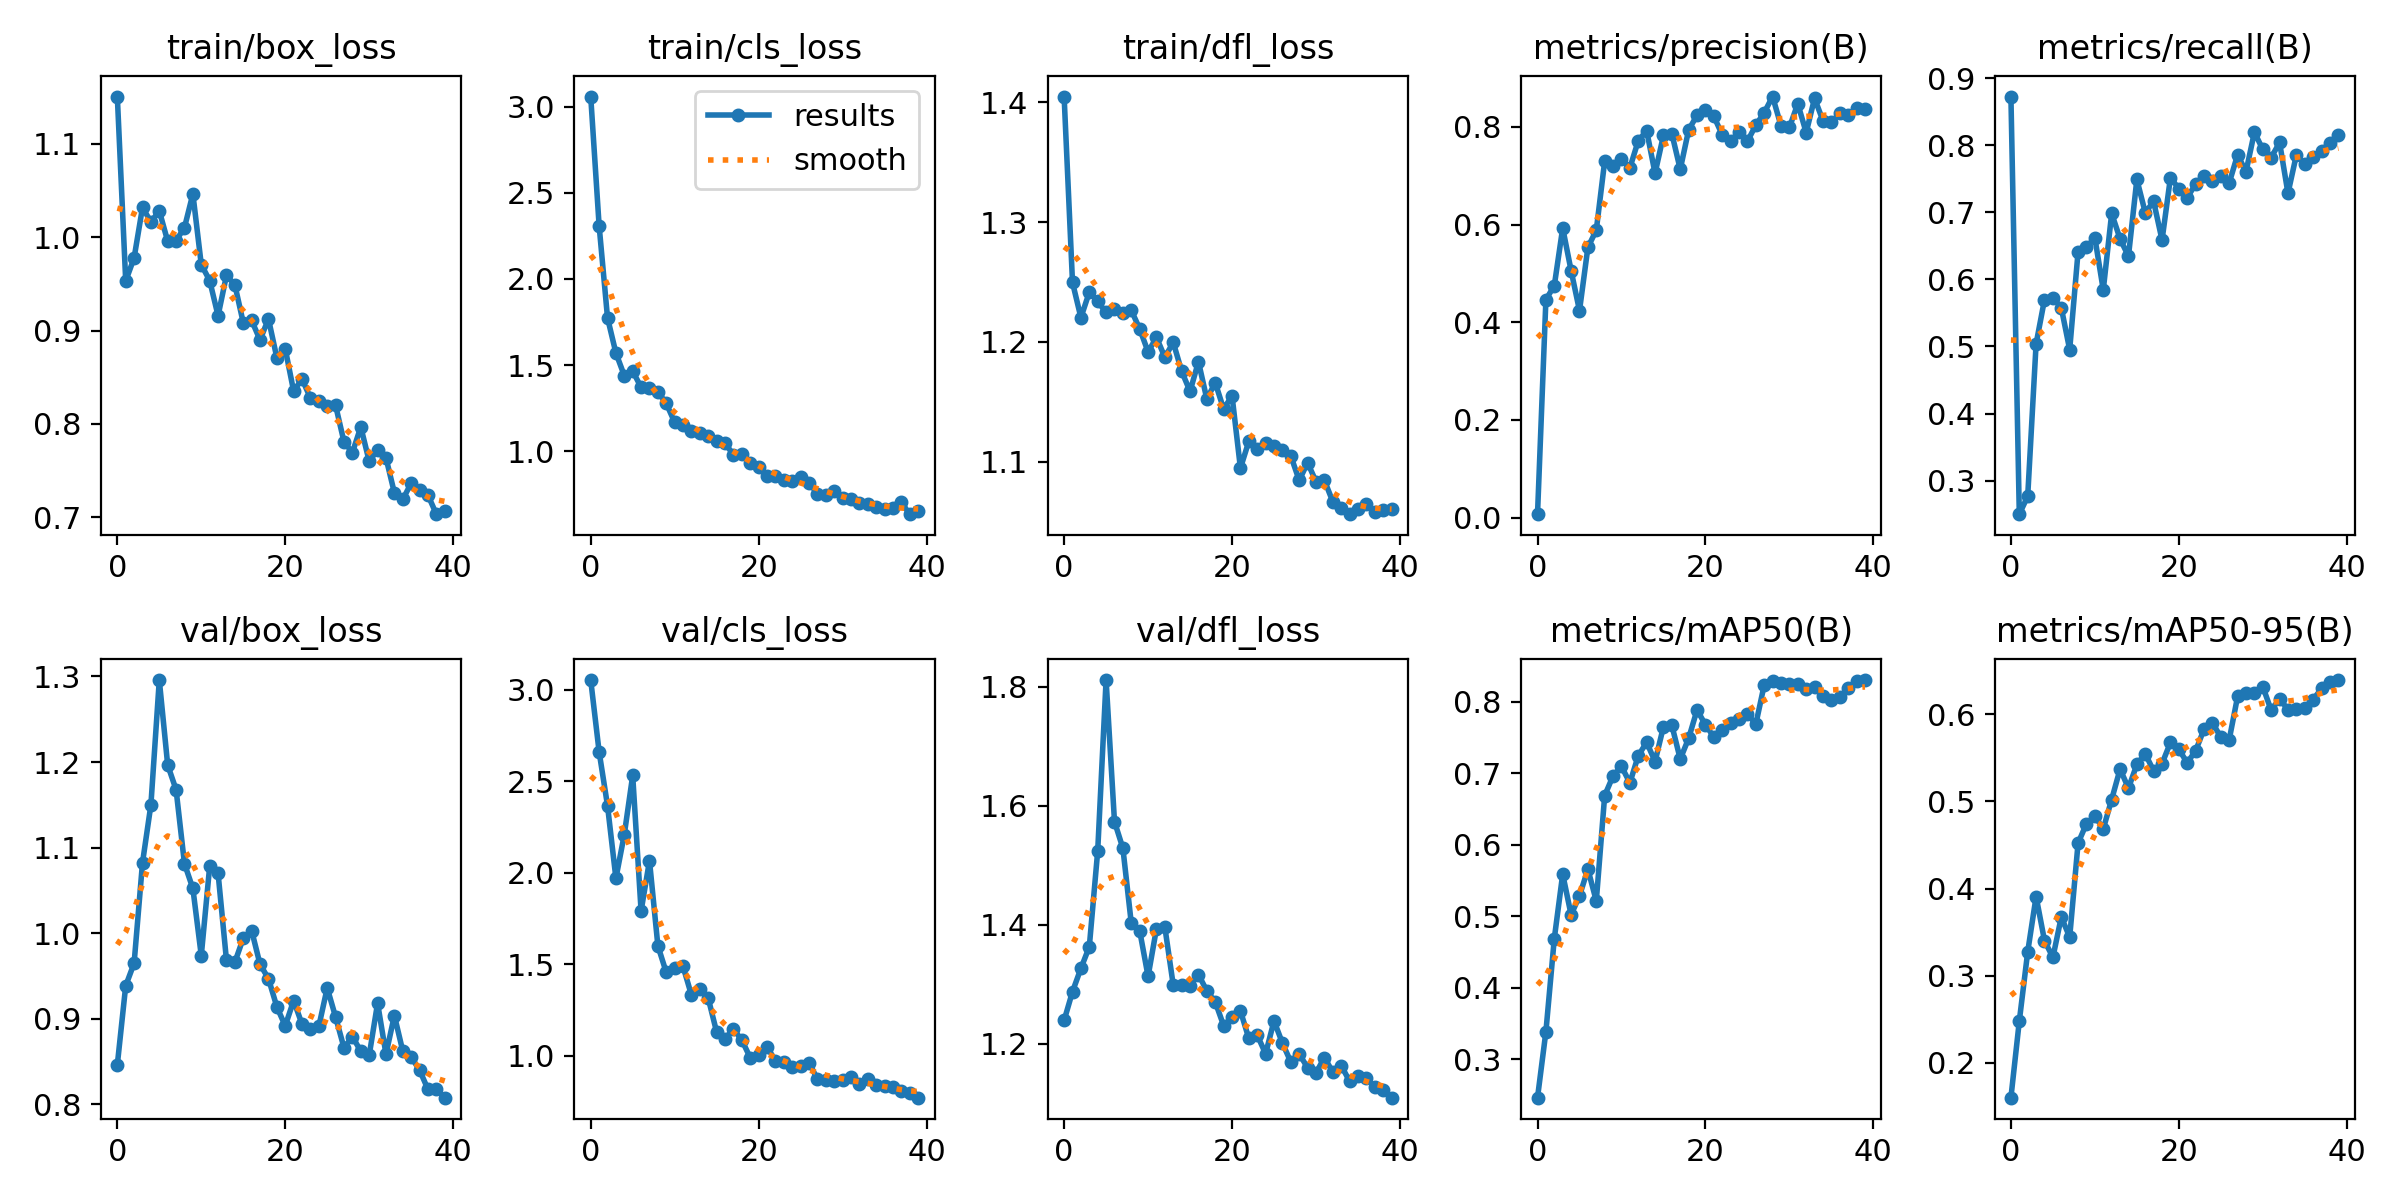

In [23]:
print("1. n, 에폭40,  베치16(vram2g) :  7분,  all        140        289      0.836      0.815       0.83      0.639    0.6/1.4           16")
Image("C:/Users/songj/Desktop/Alcohol/runs/detect/train16/results.png", width = 700)

에폭40 64


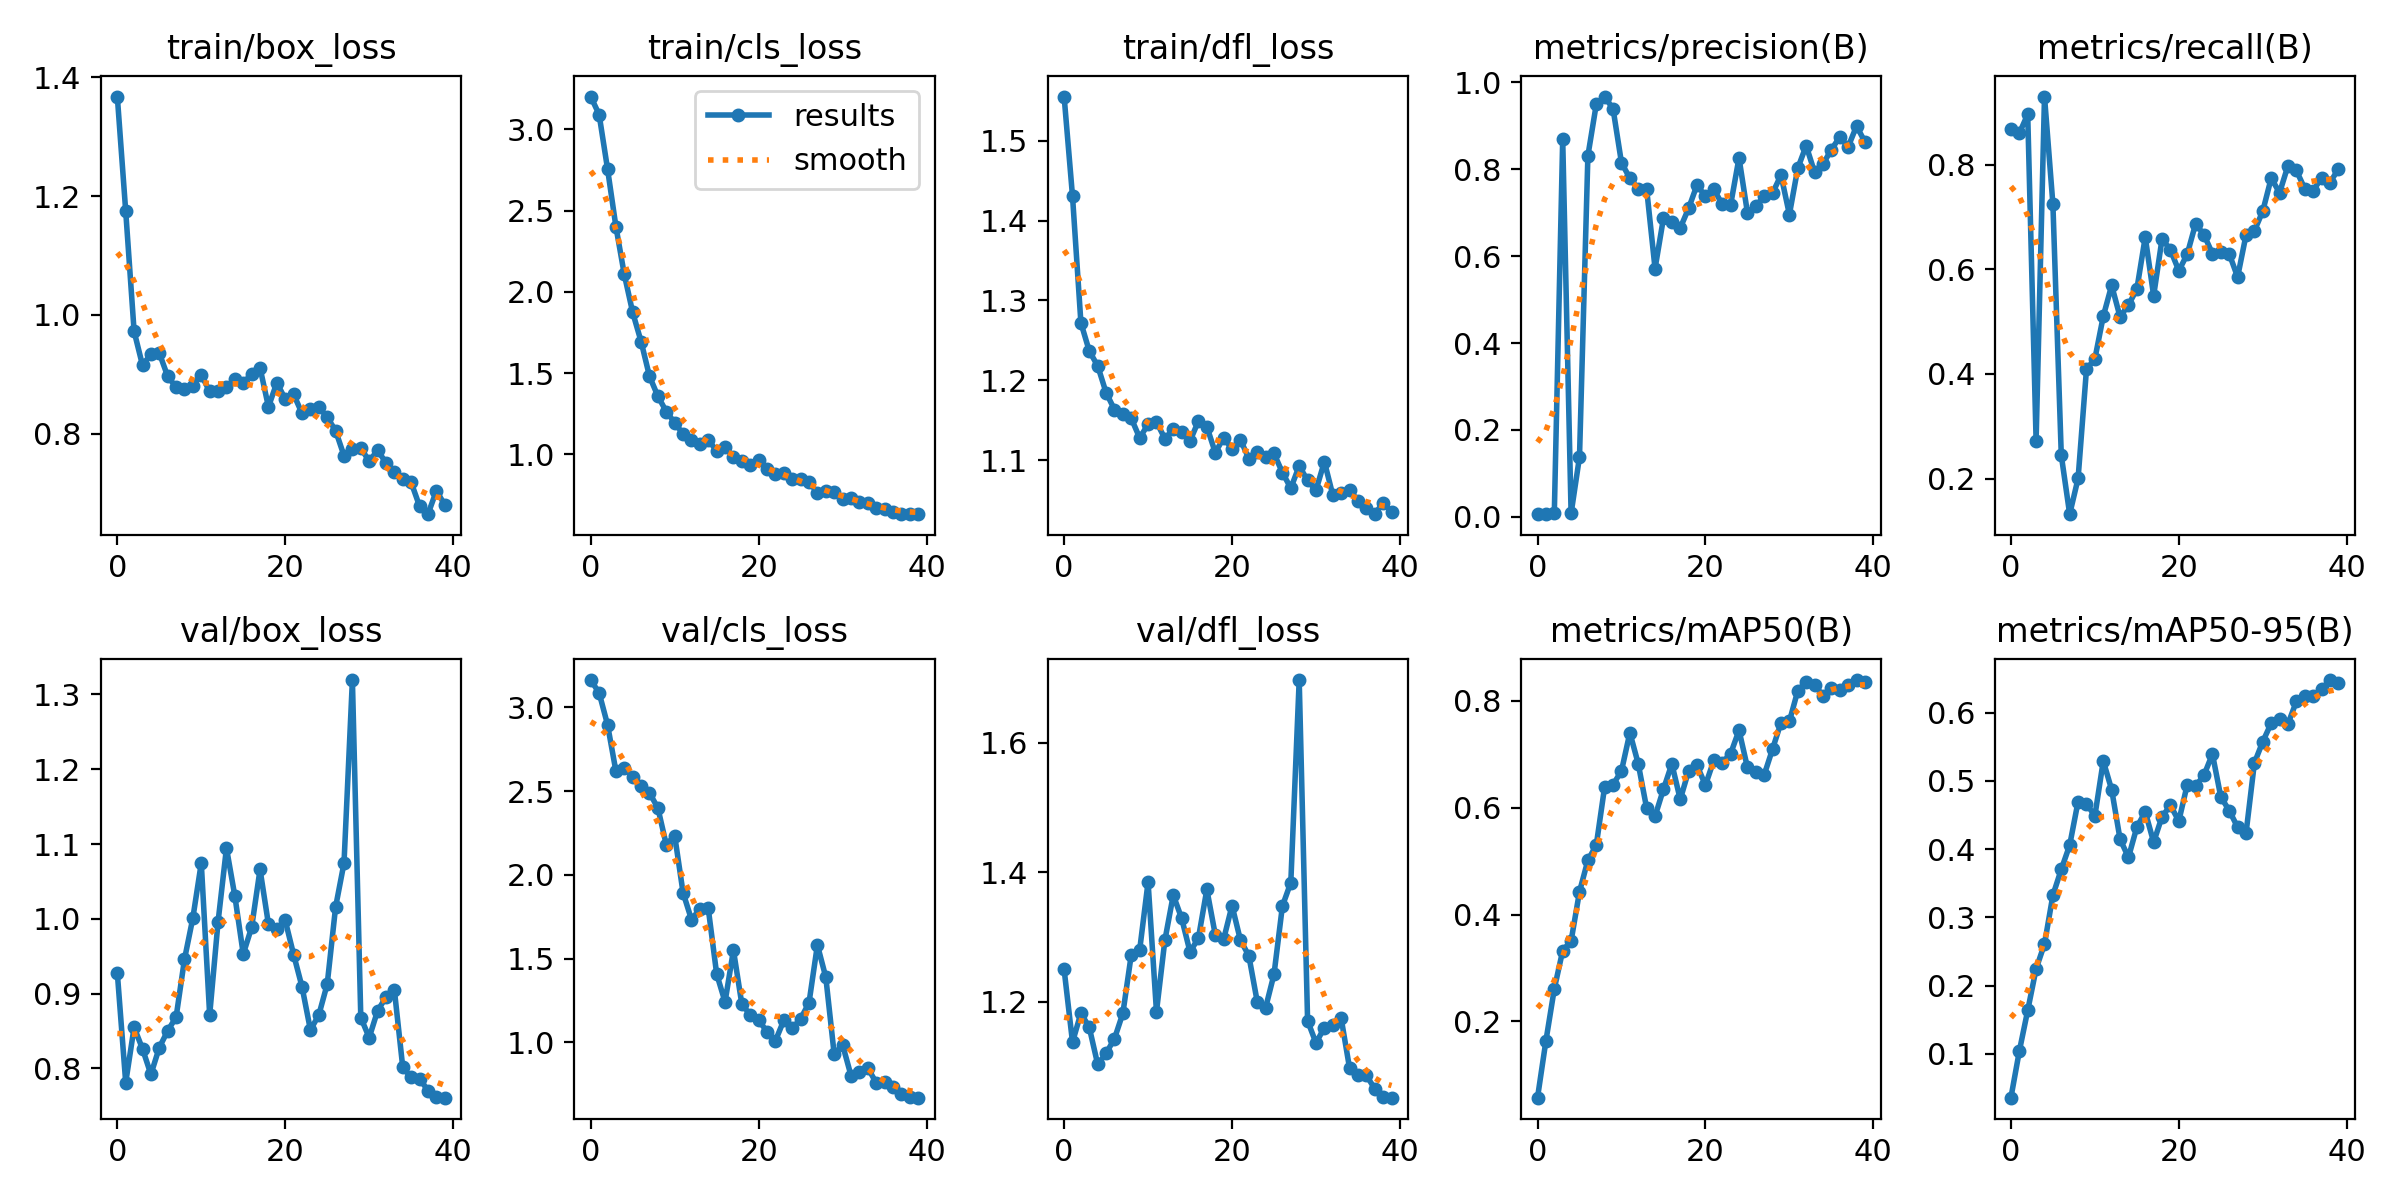

In [22]:
print("에폭40 64")
Image("C:/Users/songj/Desktop/Alcohol/runs/detect/train21/results.png", width = 700)

에폭100


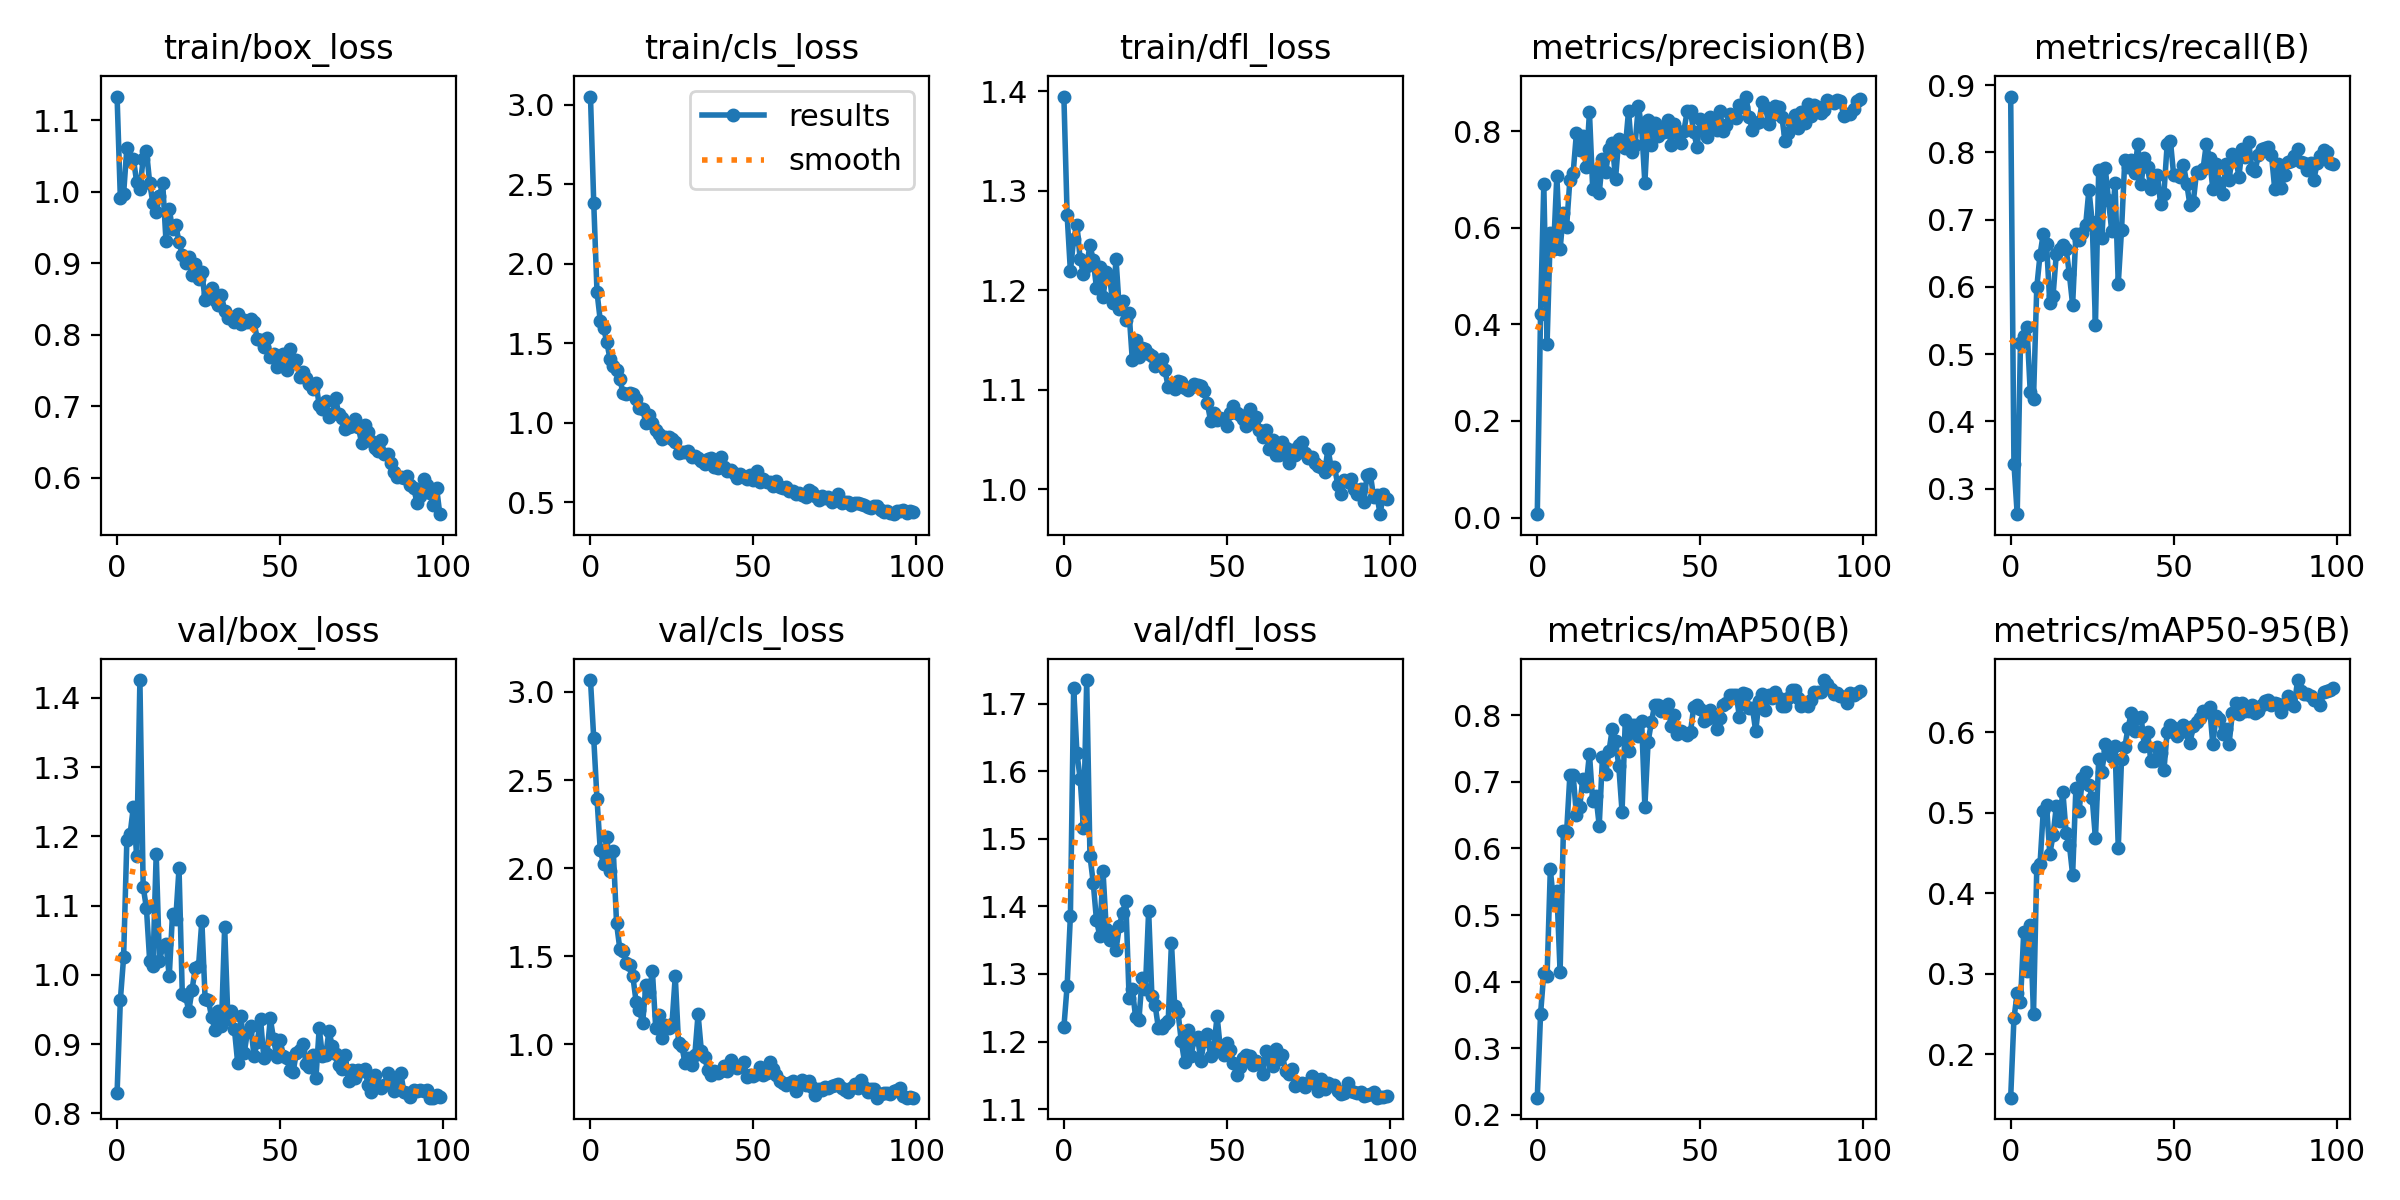

In [21]:
print("에폭100")
Image("C:/Users/songj/Desktop/Alcohol/runs/detect/train14/results.png", width = 700)

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=640


Invalid code page
New https://pypi.org/project/ultralytics/8.0.112 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.106  Python-3.11.0 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=c:\Users\songj\Desktop\Alcohol\AlcoholBottleDetect-6/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, 